# 1. Regression

## 1.1. Load Data and Train Model

In [1]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.01902558611293644)

# Create a Custom Feature Importance Calculator

In [2]:
from holisticai.utils import RegressionProxy
from holisticai.utils.feature_importances import compute_lime_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = RegressionProxy(predict=model.predict)

# Compute Importances
local_importances = compute_lime_feature_importance(X=test['X'], y=test['y'], proxy=proxy, max_samples=200)
local_conditional_importances = local_importances.conditional()
importances = local_importances.to_global()
conditional_importances = local_conditional_importances.to_global()
ranked_importances = importances.top_alpha(0.8)

# Compute Partial Dependencies
partial_dependencies = compute_partial_dependence(test['X'], features=ranked_importances.feature_names, proxy=proxy)

y_pred = proxy.predict(test['X'])

In [3]:
from holisticai.explainability.metrics import regression_explainability_metrics

regression_explainability_metrics(importances, partial_dependencies, conditional_importances, test['X'], y_pred, local_importances)

,metric,value,reference
0,Alpha Importance Score,0.752475,0.0
1,XAI Ease Score,1.000000,1.0
2,Position Parity,0.047233,1.0
3,Rank Alignment,0.620170,1.0
4,Spread Ratio,0.997286,0.0
5,Spread Divergence,0.931370,0.0
6,Data Stability,0.971714,1.0
7,Feature Stability,0.968551,1.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

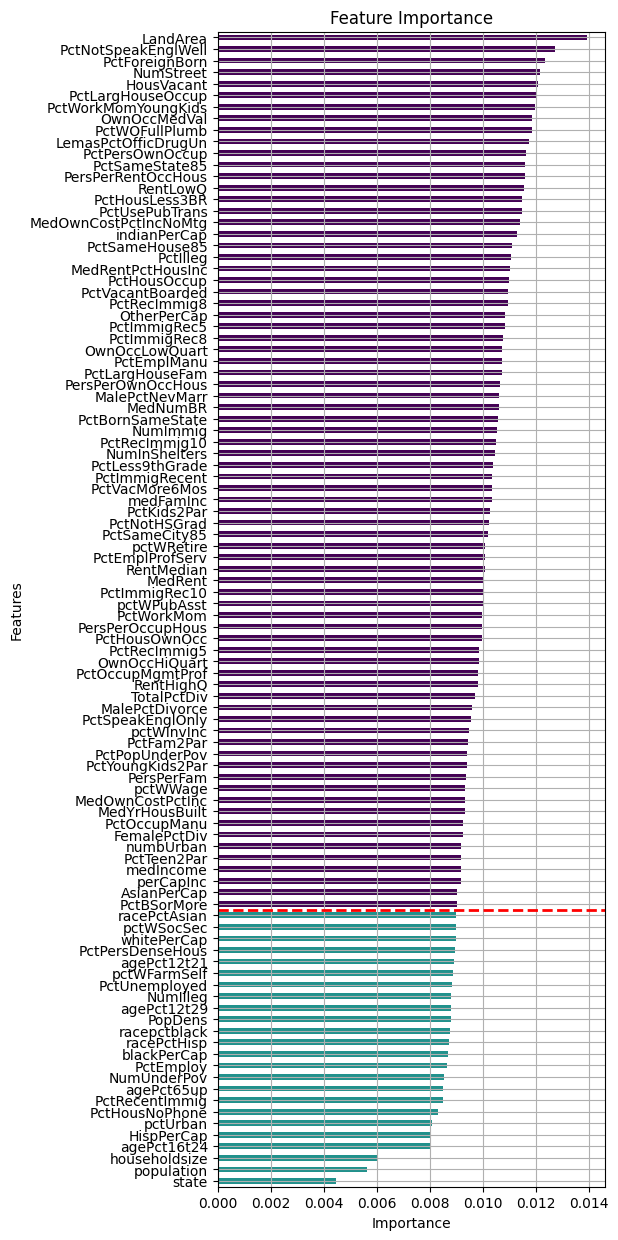

In [4]:
from holisticai.explainability.plots import plot_feature_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1, figsize=(5,15))
plot_feature_importance(importances, ax=ax, top_n=100)

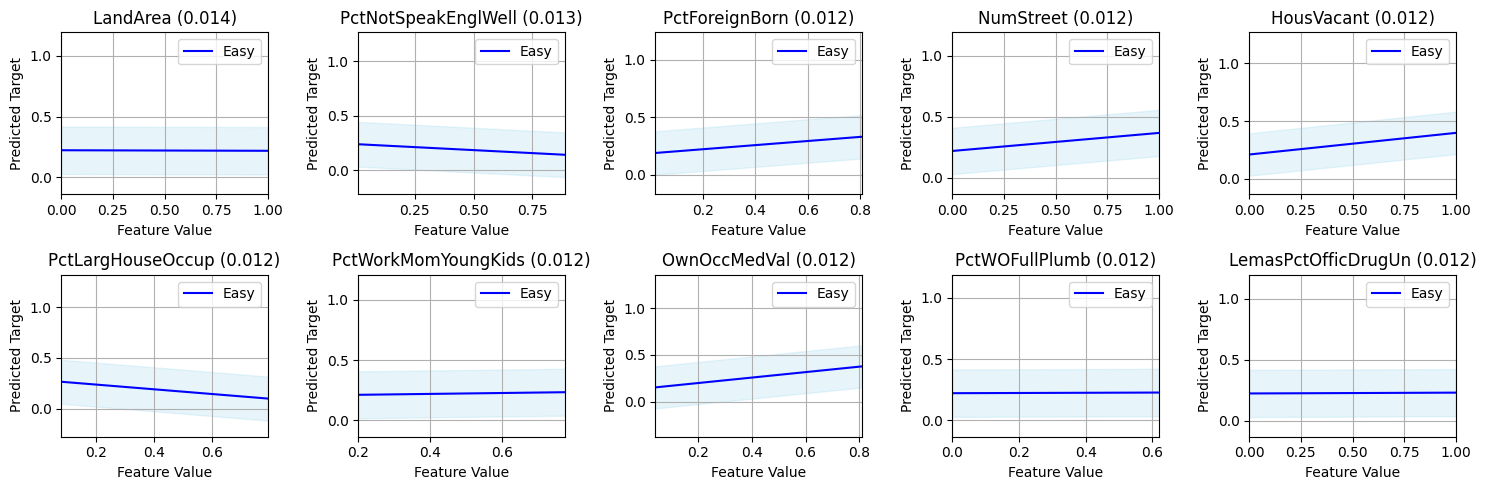

In [5]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(2,5), figsize=(15,5))

# 3. Classification

In [17]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test'].sample(200) # For faster computation

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.795

In [19]:
from holisticai.utils import BinaryClassificationProxy
from holisticai.utils.feature_importances import compute_lime_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

local_importances = compute_lime_feature_importance(X=test['X'], y=test['y'], proxy=proxy, max_samples=200)
local_conditional_importances = local_importances.conditional()

importances = local_importances.to_global()
conditional_importances = local_conditional_importances.to_global()

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(test['X'], features=ranked_importances.feature_names, proxy=proxy)

y_pred = proxy.predict(test['X'])

In [20]:
from holisticai.explainability.metrics import classification_explainability_metrics
classification_explainability_metrics(importances, partial_dependencies, conditional_importances, test['X'], y_pred, local_importances)

,metric,value,reference
0,Alpha Importance Score,0.360825,0.0
1,XAI Ease Score,1.000000,1.0
2,Position Parity,0.313126,1.0
3,Rank Alignment,0.797237,1.0
4,Spread Ratio,0.846029,0.0
5,Spread Divergence,0.520501,0.0
6,Data Stability,0.975879,1.0
7,Feature Stability,0.791370,1.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

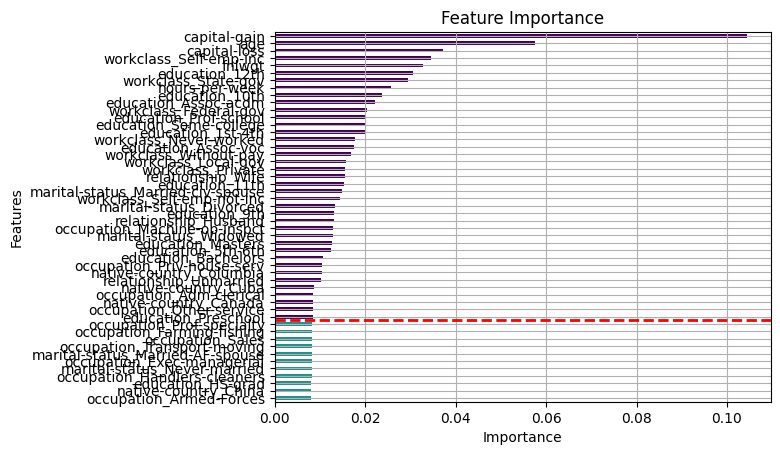

In [8]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances, top_n=50)

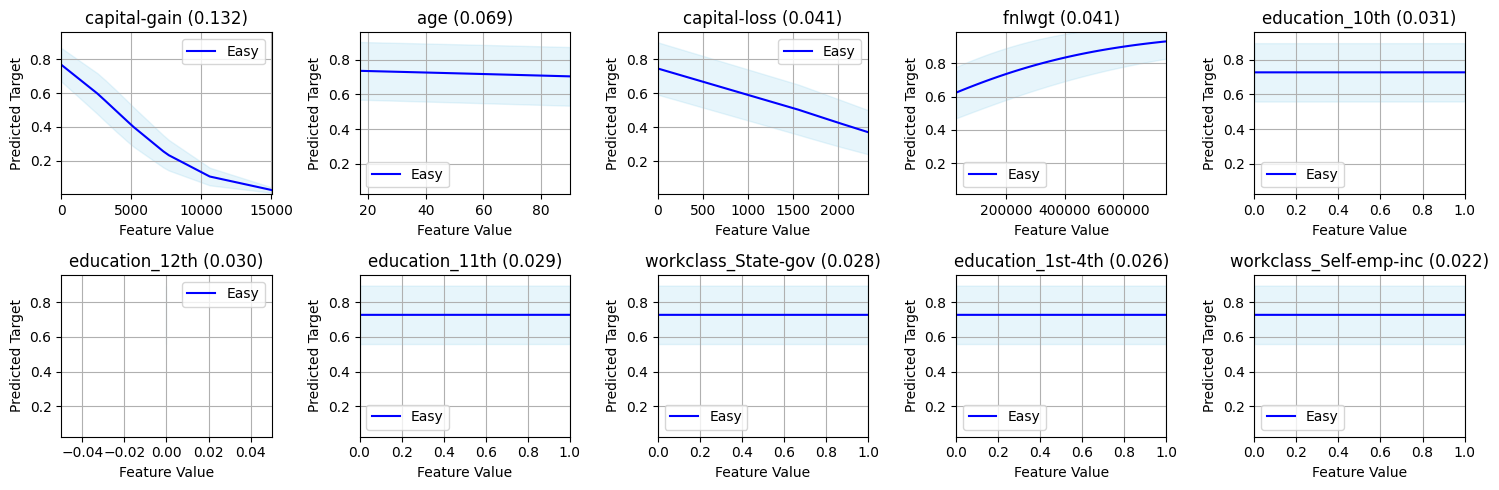

In [21]:
from holisticai.explainability.plots import plot_partial_dependence

class_index = 0 #1
plot_partial_dependence(partial_dependencies[class_index], ranked_importances, subplots=(2,5), figsize=(15,5))

# Multi Classification

In [22]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.5063291139240507

In [23]:
from holisticai.utils import MultiClassificationProxy
from holisticai.utils.feature_importances import compute_lime_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = MultiClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

local_importances = compute_lime_feature_importance(X=train['X'], y=train['y'], proxy=proxy, max_samples=200)
local_conditional_importances = local_importances.conditional()

importances = local_importances.to_global()
conditional_importances = local_conditional_importances.to_global()

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

In [25]:
from holisticai.explainability.metrics import multiclass_explainability_metrics

multiclass_explainability_metrics(importances, partial_dependencies, conditional_importances, test['X'], y_pred, local_importances)

,metric,value,reference
0,Alpha Importance Score,0.653846,0.0
1,XAI Ease Score,0.970588,1.0
2,Position Parity,0.425386,1.0
3,Rank Alignment,0.895218,1.0
4,Spread Ratio,0.971276,0.0
5,Spread Divergence,0.817411,0.0
6,Data Stability,0.986500,1.0
7,Feature Stability,0.927287,1.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

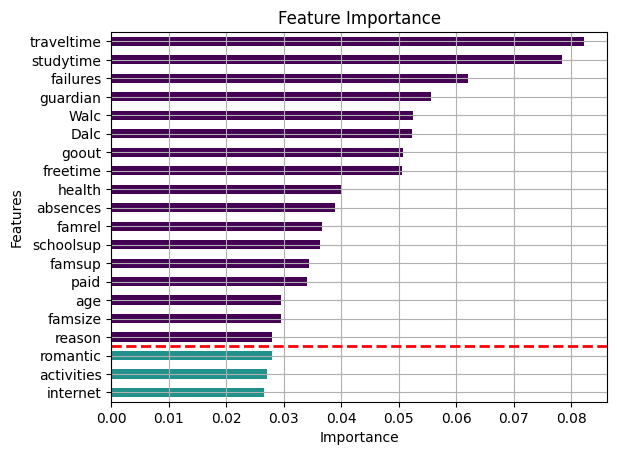

In [26]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)                

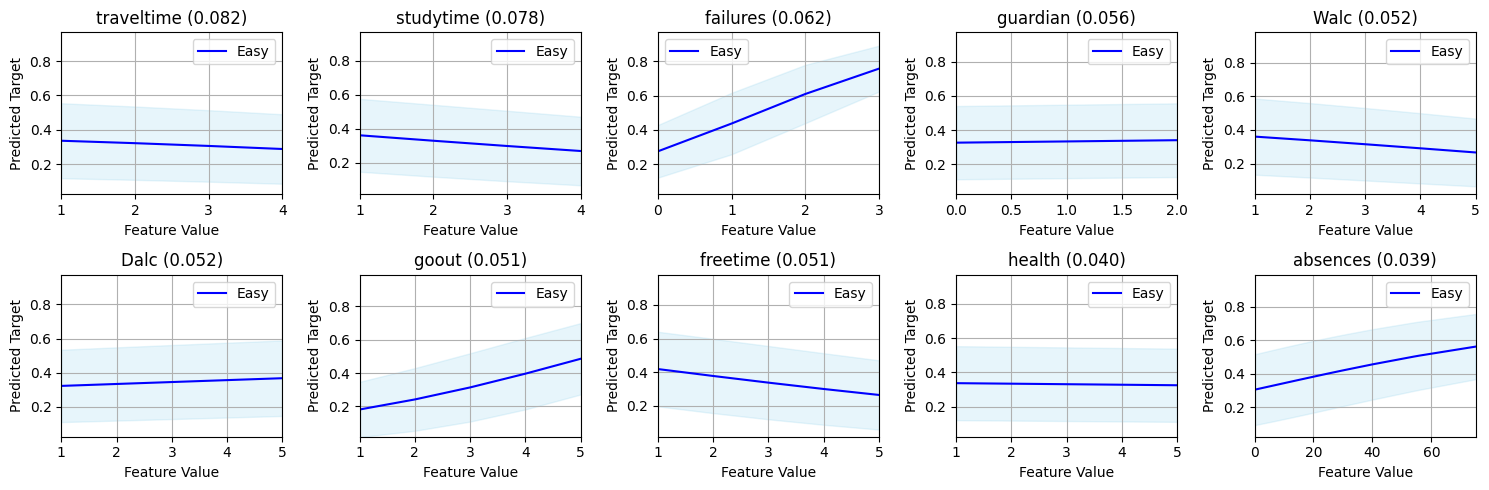

In [27]:
from holisticai.explainability.plots import plot_partial_dependence

class_index = 0 #1
plot_partial_dependence(partial_dependencies[class_index], ranked_importances, subplots=(2,5), figsize=(15,5))